<a href="https://colab.research.google.com/github/michelmartinss/Prevendo_Churn/blob/main/Classifica%C3%A7%C3%A3o_%7C_Prevendo_o_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploração de dados
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Modelo para dividir divisão da base de dados em treino e teste
from sklearn.model_selection import train_test_split

# Processo de tratamento dos dados categóricos e numéricos
from sklearn.preprocessing import MinMaxScaler

# Modelos de Classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Métricas para valaiação do modelo
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 1 - Análise exploratória dos dados (Data Understanding)

In [ ]:
# Carregar o Arquivo
df = pd.read_csv('/content/streaming_data.csv')

In [ ]:
# Visualizar os 5 primeiros registros das tabelas
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Resumo Estatístico
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Visualizar as variáveis, os tipos, a qtd de coluna, qtd de registros e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Identificar valores nulos
df.isna().sum().sort_values(ascending=False)

Num_streaming_services    68312
Subscription_type         25221
Devices_connected         25188
Time_on_platform          21420
Avg_rating                17270
Churned                   16736
Gender                    14516
Age                       11277
Num_active_profiles           0
User_id                       0
dtype: int64

In [ ]:
# Visualizar os valores nulos em %
round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Num_streaming_services    87.71
Subscription_type         32.38
Devices_connected         32.34
Time_on_platform          27.50
Avg_rating                22.17
Churned                   21.49
Gender                    18.64
Age                       14.48
Num_active_profiles        0.00
User_id                    0.00
dtype: float64

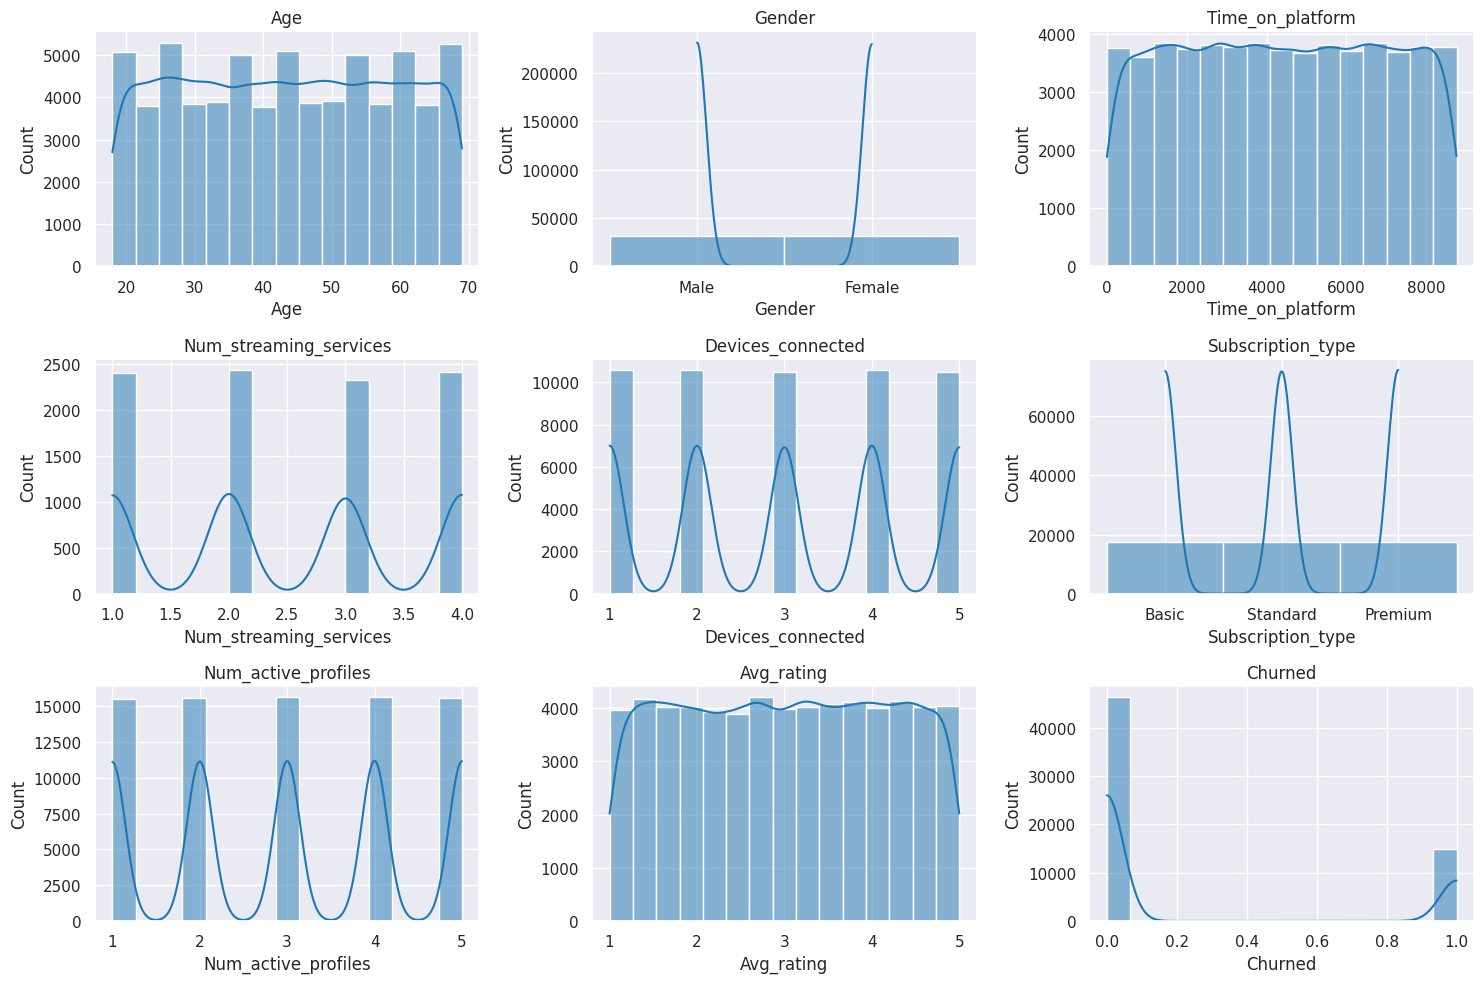

In [ ]:
# Visualiar a distribuição dos dados nas variáveis através de histogramas

# Configuração do estilo do seaborn
sns.set(style="darkgrid")

# Criar subplots com 3 linhas e 4 colunas
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Aplanar a matriz de subplots
axes = axes.flatten()

# Criar histogramas para cada coluna
for i, col in enumerate(['Age', 'Gender', 'Time_on_platform', 'Num_streaming_services',
                         'Devices_connected','Subscription_type','Num_active_profiles', 'Avg_rating', 'Churned']):
    sns.histplot(data=df, x=col, stat="count", kde=True, bins=15, ax=axes[i], color='#1f77b4')
    axes[i].set_title(col.capitalize())

# Ajustar layout
plt.tight_layout()
plt.show()

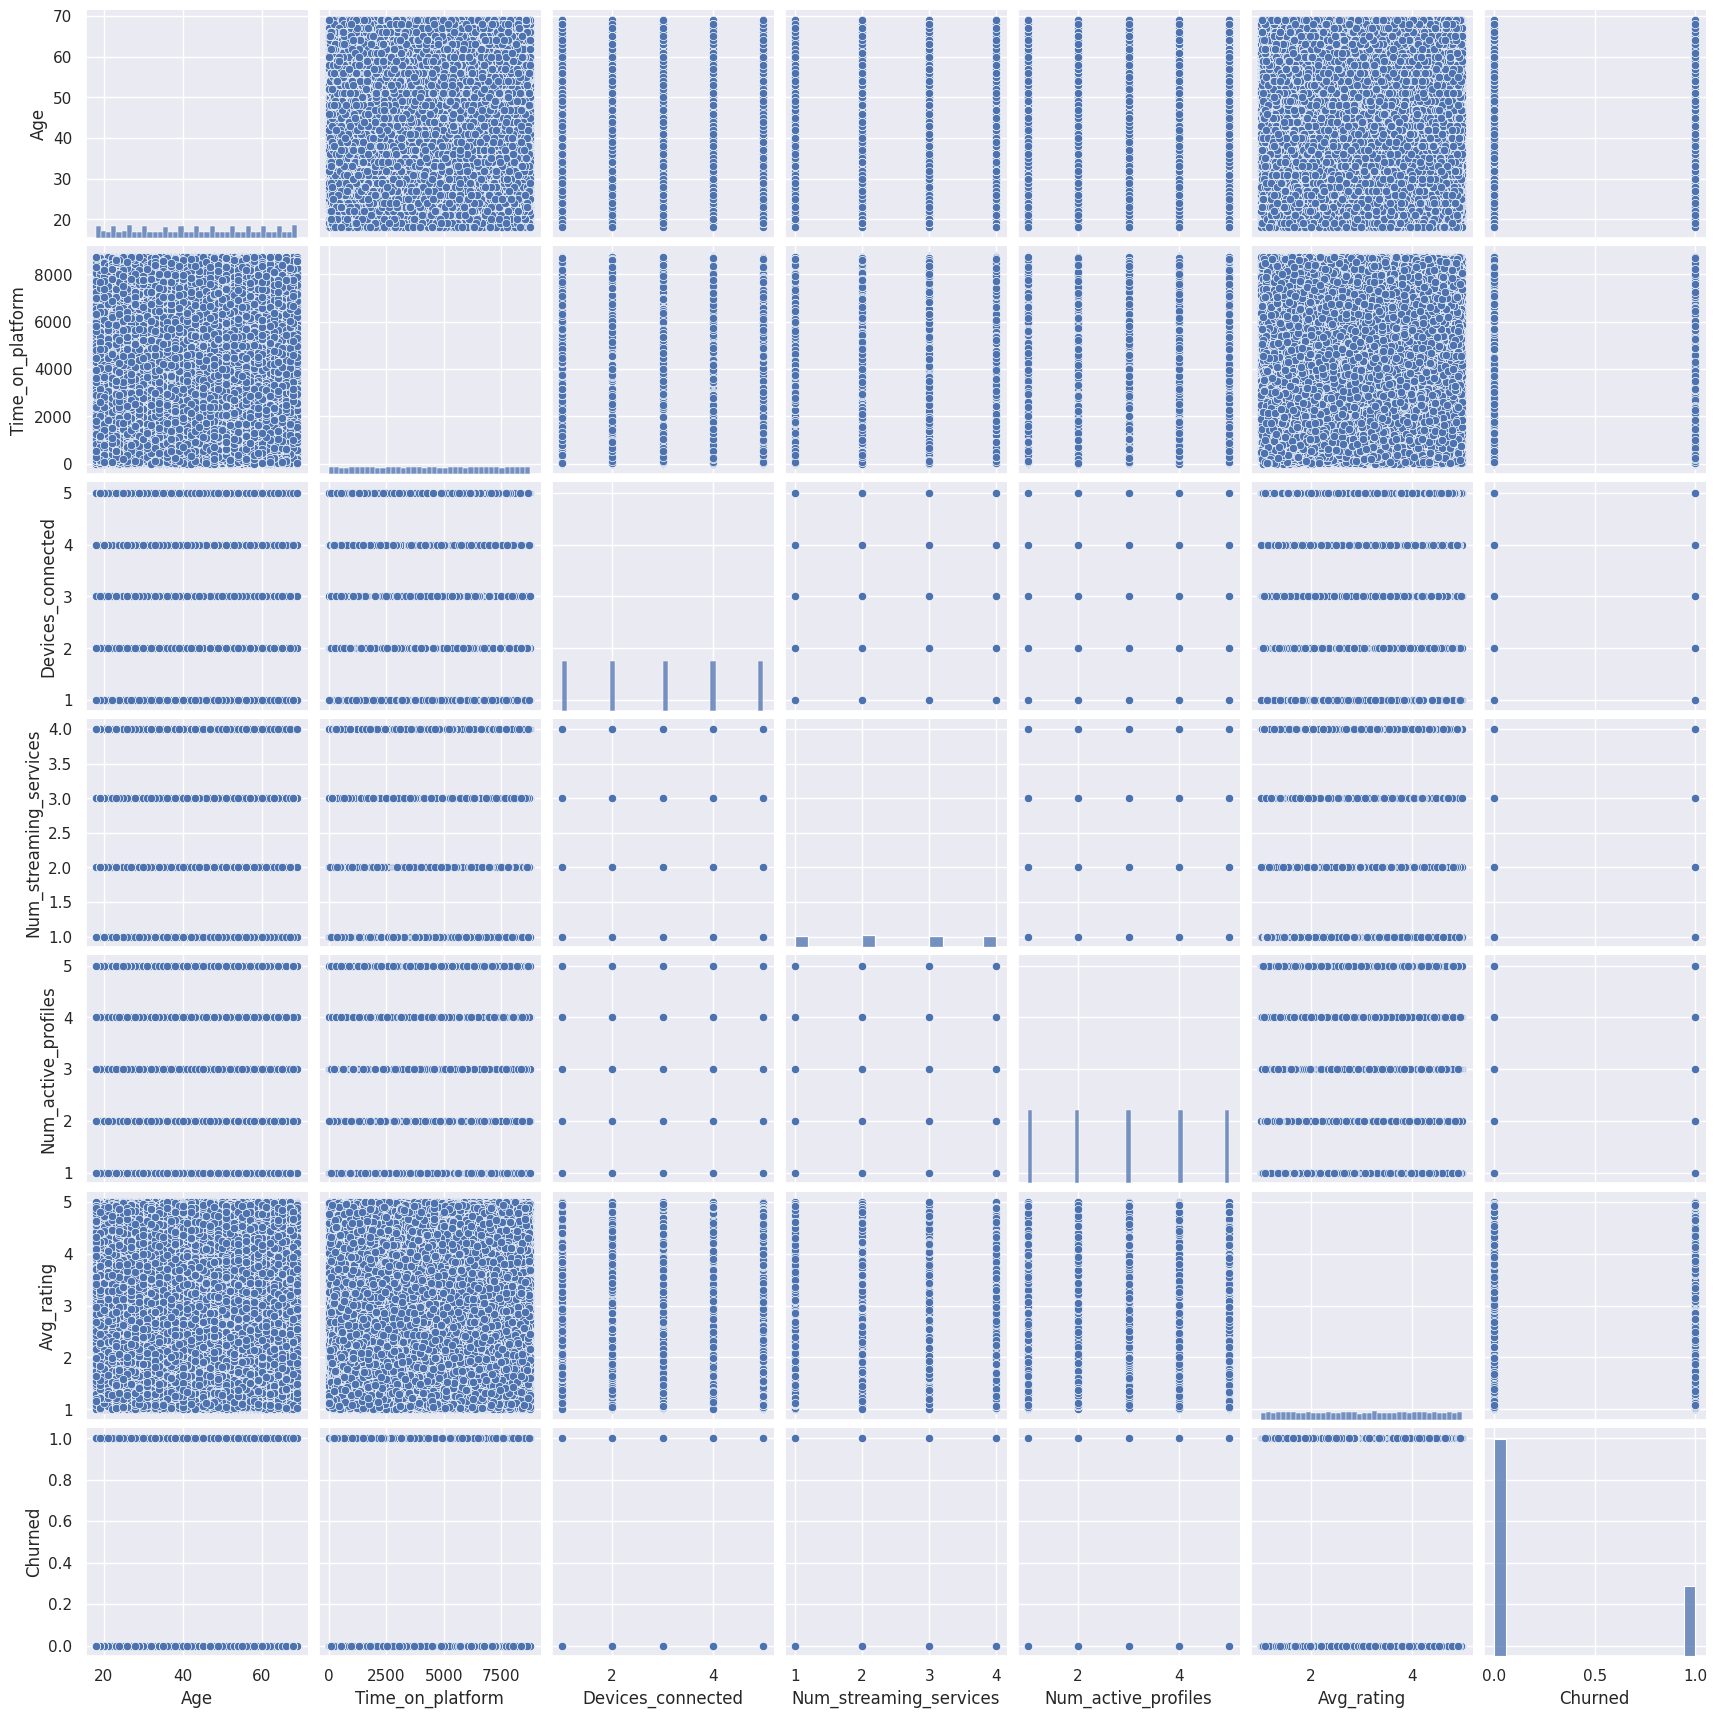

In [ ]:
# Criar uma matriz de gráficos de dispersção

ax = sns.pairplot(df)

### 2 - Tratamento dos Dados (Data Preparation)

#### 2.1 - Substituir NaN por 0 nas colunas

In [ ]:
# identificando as colunas alvos
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

In [ ]:
# Lista de colunas para substituir NaN por 0
columns_NaN_por_0 = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']

In [ ]:
# Contar a quantidade de NaN por variável
df[columns_NaN_por_0].isna().sum()

Time_on_platform          21420
Num_streaming_services    68312
Churned                   16736
Avg_rating                17270
Devices_connected         25188
dtype: int64

In [ ]:
# Substituindo NaN por 0
df[columns_NaN_por_0] = df[columns_NaN_por_0].fillna(0)

In [ ]:
# Checando a quantidade de NaN por variável
df[columns_NaN_por_0].isna().sum()

Time_on_platform          0
Num_streaming_services    0
Churned                   0
Avg_rating                0
Devices_connected         0
dtype: int64

#### 2.2 - Dropar linhas nulas nas colunas Gender, Subscription_type e Age

In [ ]:
# Lista de colunas
columns_to_drop = ['Gender', 'Subscription_type', 'Age']

# Contar a quantidade de linhas nulas para as colunas especificadas
nan_count_per_row = df[columns_to_drop].isna().sum(axis=1)

# Contar a quantidade total de linhas nulas
total_nan_count = nan_count_per_row.sum()
print(f"Total de linhas nulas: {total_nan_count}")


Total de linhas nulas: 51014


In [ ]:
# Dropar as linhas que contêm valores nulos nas colunas especificadas
df.dropna(subset=columns_to_drop, inplace=True)

In [ ]:
# Contar a quantidade de linhas nulas para as colunas especificadas
nan_count_per_row = df[columns_to_drop].isna().sum(axis=1)

# Checando a quantidade total de linhas nulas
total_nan_count = nan_count_per_row.sum()
print(f"Total de linhas nulas: {total_nan_count}")

Total de linhas nulas: 0


#### 2.3 -  Transformando valores churned 0 e 1 por No e Yes

In [ ]:
# Visualizando a variável 'Churned'
df['Churned'].head()

0    0.0
1    0.0
2    1.0
3    0.0
5    0.0
Name: Churned, dtype: float64

In [ ]:
# Substituindo os valores 0 e 1 por 'No' e 'Yes'
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [ ]:
df['Churned'].head()

0     No
1     No
2    Yes
3     No
5     No
Name: Churned, dtype: object

#### 2.4 - Transformando valores floats em valores inteiros


In [ ]:
# Identificando variáveis float
df[['Age', 'Time_on_platform','Devices_connected','Num_streaming_services', 'Avg_rating' ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Time_on_platform        36515 non-null  float64
 2   Devices_connected       36515 non-null  float64
 3   Num_streaming_services  36515 non-null  float64
 4   Avg_rating              36515 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [ ]:
# Selecionando colunas do tipo float
colunas_float = df.select_dtypes(include='float64')
colunas_float.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Avg_rating
0,49.0,4700.0,3.0,0.0,0.00
1,69.0,6107.0,2.0,0.0,2.14
2,44.0,6374.0,3.0,1.0,1.91
3,26.0,0.0,5.0,0.0,0.00
5,54.0,3024.0,2.0,0.0,0.00


In [ ]:
# Convertendo a coluna de float para int, usando for
for float in colunas_float:
  df[float] = df[float].astype(int)

In [ ]:
# Checando se foi alterado os tipos das variáveis float em inteiros
colunas_float = df.select_dtypes(include='int')
colunas_float.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating
0,49,4700,3,0,3,0
1,69,6107,2,0,1,2
2,44,6374,3,1,1,1
3,26,0,5,0,2,0
5,54,3024,2,0,1,0


In [ ]:
# Checando variáveis float
df[['Age','Time_on_platform','Devices_connected','Num_streaming_services','Avg_rating']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     36515 non-null  int64
 1   Time_on_platform        36515 non-null  int64
 2   Devices_connected       36515 non-null  int64
 3   Num_streaming_services  36515 non-null  int64
 4   Avg_rating              36515 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


### 3 - Modelagem dos Dados - Regressão Logística

In [ ]:
# Definindo variáveis  X e y

# Para a variável X, vamos remover o 'User_id' e o 'Churned', porque 'User_id' não é um dado relevante e o 'Churned', será usado na variável Y
X_rl = df.drop(columns=['User_id', 'Churned'], axis = 1)

# Definindo a variável Y com o 'Churned'
y_rl = df[['Churned']]

In [ ]:
# Ajustando o modelo

# Usando o método transform do LabelEncoder
le = LabelEncoder()

# Realizando o fit do modelo
le.fit(y_rl.Churned)
y_rl['Churned'] = le.transform(y_rl['Churned'])


# Aplicando a codificação one-hot
X_rl = pd.get_dummies(X_rl)

In [ ]:
# Normalizando as features
mm = MinMaxScaler()
X_rl = pd.DataFrame(mm.fit_transform(X_rl))

In [ ]:
# Separando a base de dados em treino e teste
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl, test_size = 0.3)

In [ ]:
# Modelagem
model = LogisticRegression()
lr = model.fit(X_train_rl, y_train_rl)

In [ ]:
# Prevendo Churned
lr.predict(X_test_rl)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Visualizando o predito: 'churn' e 'label', da LogisticRegression()

X_test_rl.assign(churn=y_test_rl).assign(label = lr.predict(X_test_rl)).head()

,0,1,2,3,4,5,6,7,8,9,10,churn,label
35291,0.019608,0.939605,0.6,0.0,1.00,0.6,1.0,0.0,0.0,1.0,0.0,NaN,0
5474,0.803922,0.000000,0.8,0.0,0.25,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
14915,0.039216,0.268410,0.8,0.0,0.75,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
25707,0.176471,0.127069,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
8612,0.764706,0.000000,0.8,0.0,0.75,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0


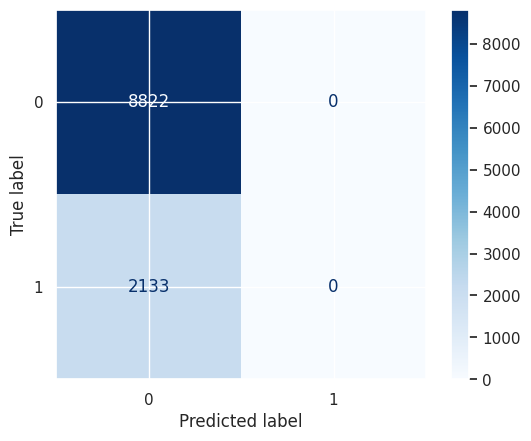

In [ ]:
# Criando a matriz de confusão para lr
lr_mc = ConfusionMatrixDisplay.from_estimator(lr, X_test_rl, y_test_rl, values_format="d", cmap=plt.cm.Blues)

In [ ]:
# Função para passar as métricas

def calculate_metrics(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_probabilities = model.predict_proba(X_train)[:, 1]
    test_probabilities = model.predict_proba(X_test)[:, 1]

    metrics = {
        "Acurácia (Treino)": accuracy_score(y_train, train_predictions),
        "Acurácia (Teste)": accuracy_score(y_test, test_predictions),
        "Acurácia Balanceada (Treino)": balanced_accuracy_score(y_train, train_predictions),
        "Acurácia Balanceada (Teste)": balanced_accuracy_score(y_test, test_predictions),
        "Precision (Treino)": precision_score(y_train, train_predictions),
        "Precision (Teste)": precision_score(y_test, test_predictions),
        "Recall (Treino)": recall_score(y_train, train_predictions),
        "Recall (Teste)": recall_score(y_test, test_predictions),
        "F1-Score (Treino)": f1_score(y_train, train_predictions),
        "F1-Score (Teste)": f1_score(y_test, test_predictions),
        "ROCAUC (Treino)": roc_auc_score(y_train, train_probabilities),
        "ROCAUC (Teste)": roc_auc_score(y_test, test_probabilities),
    }

    return metrics

# Uso da função com seu modelo (lr), X_train, y_train, X_test, y_test
resultado_metricas_lr = calculate_metrics(lr, X_train_rl, y_train_rl, X_test_rl, y_test_rl)

# Imprimir os resultados
for metrica, valor in resultado_metricas_lr.items():
    print(f"{metrica}: {valor}")

Acurácia (Treino): 0.8073943661971831
Acurácia (Teste): 0.8052943861250571
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5137619510053112
ROCAUC (Teste): 0.5022528440013209


### 4 - Modelagem dos Dados - Random Forest

In [ ]:
# Definindo as variáveis X e y para Random Forest
X_rf = df.drop(columns=['User_id', 'Churned'], axis = 1)
y_rf = df[['Churned']]

#Usando o método transform do LabelEncoder
le = LabelEncoder()

# Realizando o fit do modelo
le.fit(y_rf.Churned)
y_rf['Churned'] = le.transform(y_rf['Churned'])

# Aplicando a codificação one-hot
X_rf = pd.get_dummies(X_rf)

# Normalizando as features
mm = MinMaxScaler()
X_rf = pd.DataFrame(mm.fit_transform(X_rf))

# Separando a base de dados em treino e teste
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.3)

In [ ]:
# Aplicando a Modelagem RandomForestClassifier, para train e test já definidos
rf =  RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [ ]:
# Prevendo Churned
rf.predict(X_test_rf)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Visualizando o predito: 'churn' e 'label', do RandomForestClassifier
X_test_rf.assign(churn = y_test_rf).assign(label = rf.predict(X_test_rf)).head()

,0,1,2,3,4,5,6,7,8,9,10,churn,label
3530,0.470588,0.713666,1.0,0.00,0.75,0.6,1.0,0.0,0.0,1.0,0.0,NaN,0
5236,0.333333,0.000000,0.6,0.25,0.50,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0
18587,0.137255,0.449595,1.0,0.00,1.00,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
25600,0.529412,0.431442,0.2,0.00,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0
18118,0.372549,0.335198,0.8,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0


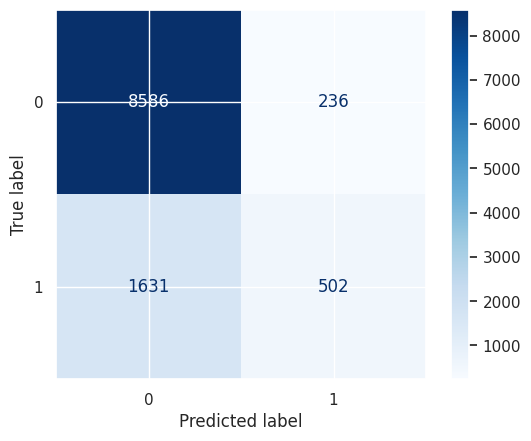

In [ ]:
# # Criando a matriz de confusão para rf
rf_mc = ConfusionMatrixDisplay.from_estimator(rf, X_test_rf, y_test_rf, values_format = "d", cmap=plt.cm.Blues)

In [ ]:
# Uso da função com seu modelo (rf)
resultado_metricas_rf = calculate_metrics(rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf)

# Imprimir os resultados
for metrica, valor in resultado_metricas_rf.items():
    print(f"{metrica}: {valor}")

Acurácia (Treino): 0.9946009389671362
Acurácia (Teste): 0.8295755362848014
Acurácia Balanceada (Treino): 0.988690907573669
Acurácia Balanceada (Teste): 0.6042989848823367
Precision (Treino): 0.9927909371781668
Precision (Teste): 0.6802168021680217
Recall (Treino): 0.9790777980905951
Recall (Teste): 0.23534927332395686
F1-Score (Treino): 0.9858866843935364
F1-Score (Teste): 0.34970393591083243
ROCAUC (Treino): 0.9997803111267691
ROCAUC (Teste): 0.6636832193904704


### 5 - Modelagem dos Dados - Tunning

In [ ]:
# Definição dos parâmetros
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

# Montagem do GridSearchCV
grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
# Definindo as variáveis X e y para Tunning
X_t = df.drop(columns=['User_id', 'Churned'], axis = 1)
y_t = df[['Churned']]

#Usando o método transform do LabelEncoder
le = LabelEncoder()

# Realizando o fit do modelo
le.fit(y_t.Churned)
y_t['Churned'] = le.transform(y_t['Churned'])

# Aplicando a codificação one-hot
X_t = pd.get_dummies(X_t)

# Normalizando as features
mm = MinMaxScaler()
X_t = pd.DataFrame(mm.fit_transform(X_t))

# Separando a base de dados em treino e teste
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size = 0.3)

In [ ]:
# Aplicando a Modelagem RandomForestClassifier, para train e test já definidos
grid_search.fit(X_train_t, y_train_t)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
# aplicando os hiperparâmetros
dict = grid_search.best_estimator_.get_params()

In [ ]:
# configurando os hiperparâmetros
rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)

In [ ]:
# Aplicando a Modelagem RandomForestClassifier com os hiperparâmetros
rf_tunned.fit(X_train_t, y_train_t)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [ ]:
# Prevendo Churned
rf_tunned.predict(X_test_t)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Visualizando o predito: 'churn' e 'label'
X_test_t.assign(churn = y_test_t).assign(label = rf_tunned.predict(X_test_t)).head()

,0,1,2,3,4,5,6,7,8,9,10,churn,label
9942,0.431373,0.222856,0.0,0.75,0.75,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
27539,0.392157,0.000000,0.0,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
21754,0.686275,0.051490,0.4,0.00,0.25,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
33320,0.372549,0.450736,0.8,0.00,0.75,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0
20366,0.490196,0.802489,0.6,0.00,0.25,0.6,1.0,0.0,1.0,0.0,0.0,NaN,0


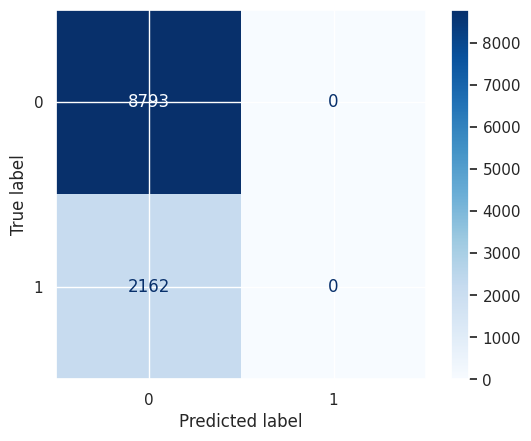

In [ ]:
# Criando a matriz de confusão para rf_tunned
tunned = ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test_t, y_test_t, values_format = "d", cmap=plt.cm.Blues);

In [ ]:
# Uso da função com seu modelo (tunned), X_train, y_train, X_test, y_test
resultado_metricas_t = calculate_metrics(rf_tunned, X_train_t, y_train_t, X_test_t, y_test_t)

# Imprimir os resultados
for metrica, valor in resultado_metricas_t.items():
    print(f"{metrica}: {valor}")

Acurácia (Treino): 0.8097026604068858
Acurácia (Teste): 0.8026471930625285
Acurácia Balanceada (Treino): 0.5030649775234982
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 1.0
Precision (Teste): 0.0
Recall (Treino): 0.006129955046996322
Recall (Teste): 0.0
F1-Score (Treino): 0.012185215272136474
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.9079265683630091
ROCAUC (Teste): 0.5871792937637614


### Comparando os Resultados

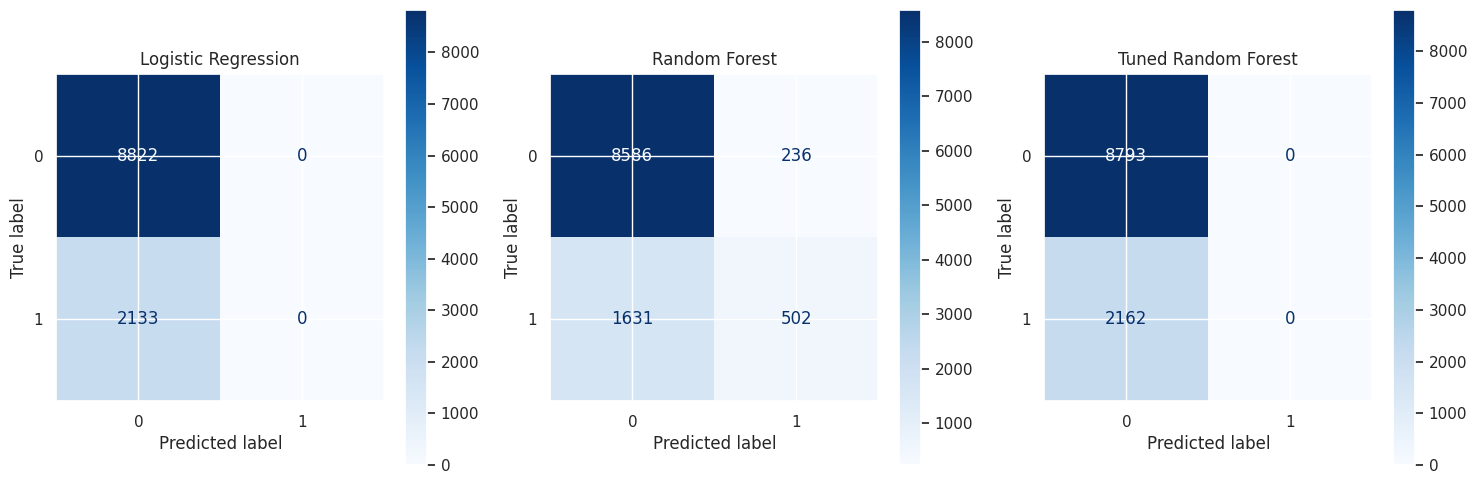

In [ ]:
# Criando gráfico com subplots para comparar as 3 matrizes de confusão

# Crie as figuras e os eixos para cada matriz de confusão
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Matriz de Confusão para o primeiro modelo (lr)
lr_mc = ConfusionMatrixDisplay.from_estimator(lr, X_test_rl, y_test_rl, values_format="d", cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Logistic Regression')

# Matriz de Confusão para o segundo modelo (rf)
rf_mc = ConfusionMatrixDisplay.from_estimator(rf, X_test_rf, y_test_rf, values_format="d", cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Random Forest')

# Matriz de Confusão para o terceiro modelo (rf_tunned)
tunned_mc = ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test_t, y_test_t, values_format="d", cmap=plt.cm.Blues, ax=axes[2])
axes[2].set_title('Tuned Random Forest')

# Ajuste os espaçamentos entre as subparcelas para melhorar a legibilidade
plt.tight_layout()

# Mostre o gráfico
plt.show()

In [ ]:
# Defina as funções para calcular as métricas
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    roc_auc_train = roc_auc_score(y_train, y_proba_train)
    roc_auc_test = roc_auc_score(y_test, y_proba_test)

    return {
        'Acurácia (Treino)': accuracy_train, 'Acurácia (Teste)': accuracy_test,
        'Acurácia Balanceada (Treino)': None, 'Acurácia Balanceada (Teste)': None,  # Lembre-se de substituir com os valores corretos
        'Precision (Treino)': precision_train, 'Precision (Teste)': precision_test,
        'Recall (Treino)': recall_train, 'Recall (Teste)': recall_test,
        'F1-Score (Treino)': f1_train, 'F1-Score (Teste)': f1_test,
        'ROCAUC (Treino)': roc_auc_train, 'ROCAUC (Teste)': roc_auc_test
    }

# Uso da função com seu modelo (lr), X_train, y_train, X_test, y_test
resultado_metricas_lr = calculate_metrics(lr, X_train_rl, y_train_rl, X_test_rl, y_test_rl)

# Uso da função com seu modelo (rf)
resultado_metricas_rf = calculate_metrics(rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf)

# Uso da função com seu modelo (tunned), X_train, y_train, X_test, y_test
resultado_metricas_t = calculate_metrics(rf_tunned, X_train_t, y_train_t, X_test_t, y_test_t)

# Crie um DataFrame pandas para armazenar as métricas
df_metrics = pd.DataFrame([resultado_metricas_lr, resultado_metricas_rf, resultado_metricas_t],
                          index=['Logistic Regression', 'Random Forest', 'Tuned Random Forest'])

df_metrics.T


,Logistic Regression,Random Forest,Tuned Random Forest
Acurácia (Treino),0.807394,0.994601,0.809703
Acurácia (Teste),0.805294,0.829576,0.802647
Acurácia Balanceada (Treino),None,None,None
Acurácia Balanceada (Teste),None,None,None
Precision (Treino),0.0,0.992791,1.0
Precision (Teste),0.0,0.680217,0.0
Recall (Treino),0.0,0.979078,0.00613
Recall (Teste),0.0,0.235349,0.0
F1-Score (Treino),0.0,0.985887,0.012185
F1-Score (Teste),0.0,0.349704,0.0


In [ ]:
# Precisão: Aproximadamente 68.02%. Quando o modelo prevê que um cliente vai cancelar a assinatura, ele está correto cerca de 68.02% das vezes.
# Recall: Aproximadamente 23.53%. O modelo é capaz de identificar corretamente cerca de 23.53% dos clientes que realmente cancelam a assinatura.
# Acurácia: Aproximadamente 82.96%. De todas as previsões feitas pelo modelo, cerca de 82.96% são corretas.
# F1-Score: Aproximadamente 34.97%. Este valor é uma medida de equilíbrio entre precisão e recall e é particularmente útil se a distribuição das classes for desigual, como parece ser o caso aqui.